In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

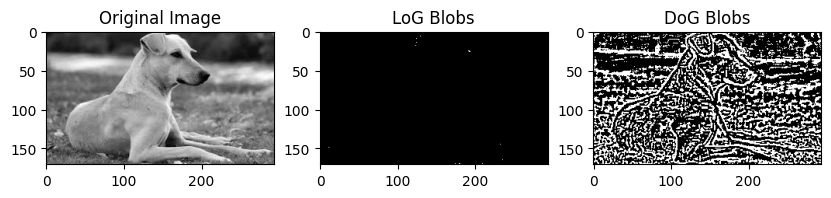

In [2]:
image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

def log_blob_detection(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    log = cv2.Laplacian(blurred, cv2.CV_64F)
    log = np.uint8(np.absolute(log))
    _, binary = cv2.threshold(log, 50, 255, cv2.THRESH_BINARY)
    return binary

def dog_blob_detection(image):
    gauss1 = cv2.GaussianBlur(image, (5, 5), 1)
    gauss2 = cv2.GaussianBlur(image, (5, 5), 2)
    dog = gauss1 - gauss2
    _, binary = cv2.threshold(dog, 20, 255, cv2.THRESH_BINARY)
    return binary

log_result = log_blob_detection(image)
dog_result = dog_blob_detection(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.title("Original Image"), plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2), plt.title("LoG Blobs"), plt.imshow(log_result, cmap='gray')
plt.subplot(1, 3, 3), plt.title("DoG Blobs"), plt.imshow(dog_result, cmap='gray')
plt.show()

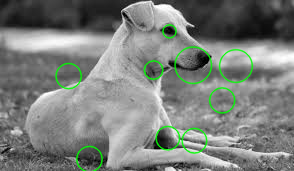

In [3]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
params.maxArea = 2000
params.filterByCircularity = False
params.filterByInertia = False
params.filterByConvexity = False

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image)
image_with_blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(image_with_blobs)

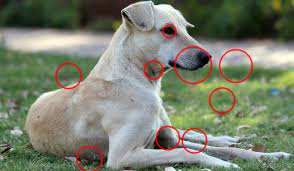

In [4]:
color_image = cv2.imread('dog.jpg')
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
keypoints = detector.detect(gray_image)
color_image_with_blobs = cv2.drawKeypoints(color_image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(color_image_with_blobs)

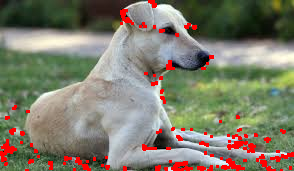

In [6]:
# Load the image
image = cv2.imread('dog.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Harris corner detection
gray = np.float32(gray)
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate to mark the corners
harris_corners = cv2.dilate(harris_corners, None)

# Threshold for detecting strong corners
threshold = 0.01 * harris_corners.max()
image[harris_corners > threshold] = [0, 0, 255] # Mark corners in red

# Display the result
# cv2.imshow('Harris Corners', image)

cv2_imshow(image)
